In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Importance of Visual Exploration

EDA often emphasizes visual techniques because parametric summary statistics (mean, standard deviation, correlation) can be misleading. In some cases they beg the question. If you haven't determined if the normal distribution is a good model for a variable, why are you calculating the mean and variance? For now, we emphasize that we are only calculating the descriptive statistics (parametric and non-parametric) of empirical distributions and we are so far agnostic about the appropriate model for our data. We'll return to this in a later chapter.

Non-parametric summary statistics (median, interquartile range) can be misleading as well although to a lesser degree. 

To illustrate the power of visualization for exploratory data analysis, we often rely on four data sets called "Anscombe's Quartet". These four data sets of two variables, (x, y), have interesting properties:

1. All x's have the same mean and variance.
2. All y's have the same mean and variance.
3. The Pearson's Correlation Coefficient between x and y are the same for all the data sets.

Here are four data sets of Anscombe's Quartet:

In [3]:
data_set_a = [(10.0, 8.04), (8.0, 6.95), (13.0, 7.58), (9.0, 8.81), (11.0, 8.33), (14.0, 9.96), \
              (6.0, 7.24), (4.0, 4.26), (12.0, 10.84), (7.0, 4.82), (5.0, 5.68)]
data_set_b = [(10.0, 9.14), (8.0, 8.14), (13.0, 8.74), (9.0, 8.77), (11.0, 9.26), (14.0, 8.10), \
              (6.0, 6.13), (4.0, 3.10), (12.0, 9.13), (7.0, 7.26), (5.0, 4.74)]
data_set_c = [(10.0, 7.46), (8.0, 6.77), (13.0, 12.74), (9.0, 7.11), (11.0, 7.81), (14.0, 8.84), \
              (6.0, 6.08), (4.0, 5.39), (12.0, 8.15), (7.0, 6.42), (5.0, 5.73)]
data_set_d = [(8.0, 6.58), (8.0, 5.76), (8.0, 7.71), (8.0, 8.84), (8.0, 8.47), (8.0, 7.04), \
              (8.0, 5.25), (19.0, 12.50), (8.0, 5.56), (8.0, 7.91), (8.0, 6.89)]

and we're going to apply the usual *parametric* descriptive statistics to them: mean, variance, Pearson's $r$:

In [4]:
def analyze_data( name, data_set):
    x, y = zip( *data_set)
    print( name)
    print( "----------")
    print( "Stats\t", "Mean", "Variance", "Correlation")
    print( "X\t", "%.2f\t" % np.mean( x), "%.2f\t" % np.var( x))
    print( "Y\t", "%.2f\t" % np.mean( y), "%.2f\t" % np.var( y), "%.2f" % \
          stats.pearsonr( x, y)[ 0])
    print( "---------")

Here's the results for Data Set A:

In [5]:
analyze_data( "Data Set A", data_set_a)

Data Set A
----------
Stats	 Mean Variance Correlation
X	 9.00	 10.00	
Y	 7.50	 3.75	 0.82
---------


Here's the results for Data Set B:

In [6]:
analyze_data( "Data Set B", data_set_b)

Data Set B
----------
Stats	 Mean Variance Correlation
X	 9.00	 10.00	
Y	 7.50	 3.75	 0.82
---------


Here's the results of Data Set C:

In [7]:
analyze_data( "Data Set C", data_set_c)

Data Set C
----------
Stats	 Mean Variance Correlation
X	 9.00	 10.00	
Y	 7.50	 3.75	 0.82
---------


Here's the results of Data Set D:

In [8]:
analyze_data( "Data Set D", data_set_d)

Data Set D
----------
Stats	 Mean Variance Correlation
X	 9.00	 10.00	
Y	 7.50	 3.75	 0.82
---------


Just be looking at these descriptive statistics, these data seem to be coming from the same distribution and have the same relationship. You might even be tempted to look to make sure I didn't pull a fast one on you or make a copy-paste error.

Let's look at the same data using non-parametric descriptive statistics:

In [9]:
def tukeys_five( name, variables, data_sets):
    def f( val):
        return "%.2f" % val
    print( name)
    print( "----------")
    print( "Stat\t", "Min\t", "1Q\t", "Median\t", "3Q\t", "Max")
    data = {}
    for i, data_set in enumerate( data_sets):
        data[i] = data_set
        quartiles = stats.mstats.mquantiles( data_set, [0.25, 0.5, 0.75])    
        print( variables[ i],"\t",f( np.min( data_set)),"\t", \
              f( quartiles[ 0]),"\t", f(quartiles[ 1]),"\t", \
              f(quartiles[ 2]),"\t", f(np.max( data_set)))
    print("rho=", stats.spearmanr( data[0], data[1])[0])
    print( "----------")

Tukey's Five plus Spearman's for Data Set A:

In [10]:
tukeys_five( "Data Set A", ["X", "Y"], zip(*data_set_a))

Data Set A
----------
Stat	 Min	 1Q	 Median	 3Q	 Max
X 	 4.00 	 6.20 	 9.00 	 11.80 	 14.00
Y 	 4.26 	 5.93 	 7.58 	 8.71 	 10.84
rho= 0.8181818181818182
----------


Tukey's Five plus Spearman's for Data Set B:

In [11]:
tukeys_five( "Data Set B", ["X", "Y"], zip(*data_set_b))

Data Set B
----------
Stat	 Min	 1Q	 Median	 3Q	 Max
X 	 4.00 	 6.20 	 9.00 	 11.80 	 14.00
Y 	 3.10 	 6.36 	 8.14 	 9.06 	 9.26
rho= 0.690909090909091
----------


Tukey's Five plus Spearman's for Data Set C:

In [12]:
tukeys_five( "Data Set C", ["X", "Y"], zip(*data_set_c))

Data Set C
----------
Stat	 Min	 1Q	 Median	 3Q	 Max
X 	 4.00 	 6.20 	 9.00 	 11.80 	 14.00
Y 	 5.39 	 6.15 	 7.11 	 8.08 	 12.74
rho= 0.990909090909091
----------


Tukey's Five plus Spearman's for Data Set D:

In [13]:
tukeys_five( "Data Set D", ["X", "Y"], zip(*data_set_d))

Data Set D
----------
Stat	 Min	 1Q	 Median	 3Q	 Max
X 	 8.00 	 8.00 	 8.00 	 8.00 	 19.00
Y 	 5.25 	 5.92 	 7.04 	 8.36 	 12.50
rho= 0.5
----------


Notice that the non-parametric descriptive statistics give us a much better idea of the data and that they *are* different.  X seems to be the same or at least similar in Data Set's A, B and C but what's going on with D? They're almost all 8. It's much more difficult to discern anything interesting about Y.

In terms of relationships, for Data Set's A, B and C, we have weak to strong monotonic increasing relationships and with Data Set D, again, we have a very weak monotonic increasing relationship. And yet, we're still a bit in the dark about what's going on with this data.

Let's plot the data sets:

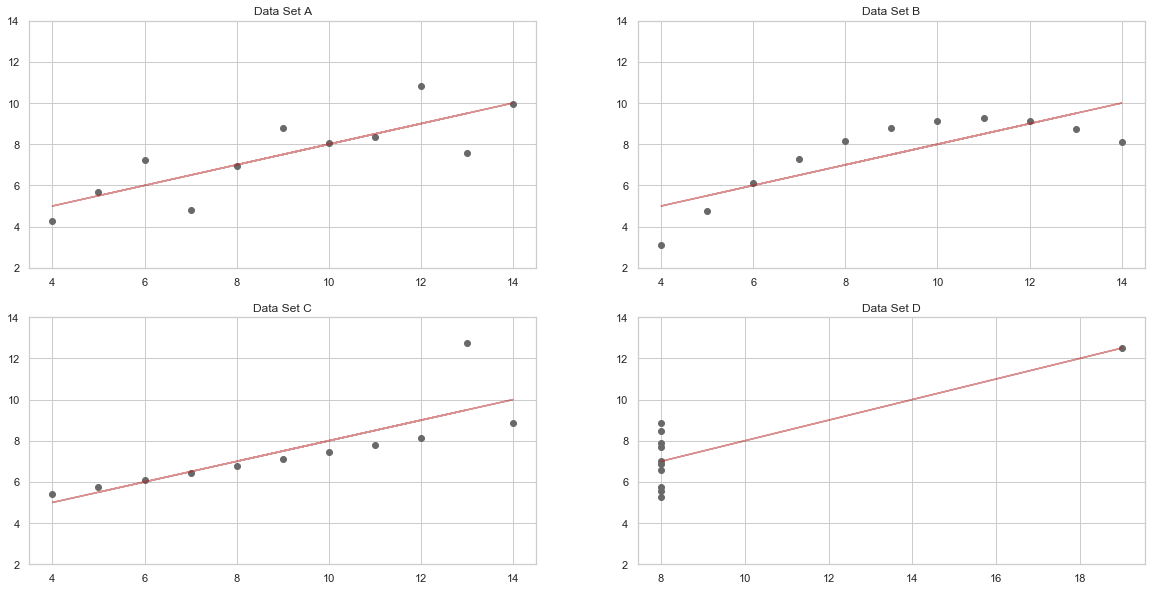

In [14]:
figure = plt.figure(figsize=(20,10))

axes = figure.add_subplot(2, 2, 1)
x, y = zip( *data_set_a)
axes.scatter( x, y, color="DimGray")
m, b = np.polyfit(x, y, 1)
axes.plot(x, [m * j + b for j in x], '-', color="firebrick", alpha=0.5)
axes.set_title( "Data Set A")
axes.set_ylim((2, 14))

axes = figure.add_subplot(2, 2, 2)
x, y = zip( *data_set_b)
axes.scatter( x, y, color="DimGray")
m, b = np.polyfit(x, y, 1)
axes.plot(x, [m * j + b for j in x], '-', color="firebrick", alpha=0.5)
axes.set_title( "Data Set B")
axes.set_ylim((2, 14))

axes = figure.add_subplot(2, 2, 3)
x, y = zip( *data_set_c)
axes.scatter( x, y, color="DimGray")
m, b = np.polyfit(x, y, 1)
axes.plot(x, [m * j + b for j in x], '-', color="firebrick", alpha=0.5)
axes.set_title( "Data Set C")
axes.set_ylim((2, 14))

axes = figure.add_subplot(2, 2, 4)
x, y = zip( *data_set_d)
axes.scatter( x, y, color="DimGray")
m, b = np.polyfit(x, y, 1)
axes.plot(x, [m * j + b for j in x], '-', color="firebrick", alpha=0.5)
axes.set_title( "Data Set D")
axes.set_ylim((2, 14))

plt.show()
plt.close()

Only by plotting the data sets do we really get to see the actual structure of the data. The descriptive statistics completely fail to capture what's going on. The focus of EDA is almost entirely on visualization, exploring the structure of your data visually. They are the canonical example of why visualization is important in EDA.